In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import keras
from keras import layers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D,GlobalAveragePooling2D, ZeroPadding2D, Dropout, Flatten, Concatenate, Reshape, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model

In [ ]:
training_dirRCC = "/content/drive/MyDrive/KOMPOZISYON/RCC/train"
validation_dirRCC = "/content/drive/MyDrive/KOMPOZISYON/RCC/test"

training_dirLCC = "/content/drive/MyDrive/KOMPOZISYON/LCC/train"
validation_dirLCC = "/content/drive/MyDrive/KOMPOZISYON/LCC/test"

training_dirLMLO = "/content/drive/MyDrive/KOMPOZISYON/LMLO/train"
validation_dirLMLO = "/content/drive/MyDrive/KOMPOZISYON/LMLO/test"

training_dirRMLO = "/content/drive/MyDrive/KOMPOZISYON/RMLO/train"
validation_dirRMLO = "/content/drive/MyDrive/KOMPOZISYON/RMLO/test"



In [ ]:
train_generatorRCC = tf.keras.preprocessing.image_dataset_from_directory(training_dirRCC,
                                                       image_size=(512,512),
                                                       shuffle=False,
                                                       label_mode='categorical',
                                                       batch_size = 16)

validation_generatorRCC = tf.keras.preprocessing.image_dataset_from_directory(validation_dirRCC,
                                                              image_size=(512,512),
                                                              shuffle=False,
                                                              label_mode='categorical',
                                                              batch_size= 16)

train_generatorLCC = tf.keras.preprocessing.image_dataset_from_directory(training_dirLCC,
                                                       image_size=(512,512),
                                                       shuffle=False,
                                                       label_mode='categorical',
                                                       batch_size = 16)

validation_generatorLCC = tf.keras.preprocessing.image_dataset_from_directory(validation_dirLCC,
                                                                  image_size=(512,512),
                                                                  shuffle=False,
                                                                  label_mode='categorical',
                                                                  batch_size= 16)

train_generatorLMLO = tf.keras.preprocessing.image_dataset_from_directory(training_dirLMLO,
                                                           image_size=(512,512),
                                                           shuffle=False,
                                                           label_mode='categorical',
                                                           batch_size = 16)

validation_generatorLMLO = tf.keras.preprocessing.image_dataset_from_directory(validation_dirLMLO,
                                                                  image_size=(512,512),
                                                                  shuffle=False,
                                                                  label_mode='categorical',
                                                                  batch_size= 16)

train_generatorRMLO = tf.keras.preprocessing.image_dataset_from_directory(training_dirRMLO,
                                                           image_size=(512,512),
                                                           shuffle=False,
                                                           label_mode='categorical',
                                                           batch_size = 16)

validation_generatorRMLO = tf.keras.preprocessing.image_dataset_from_directory(validation_dirRMLO,
                                                                  image_size=(512,512),
                                                                  shuffle=False,
                                                                  label_mode='categorical',
                                                                  batch_size= 16)




Found 3144 files belonging to 4 classes.
Found 767 files belonging to 4 classes.
Found 3144 files belonging to 4 classes.
Found 767 files belonging to 4 classes.
Found 3144 files belonging to 4 classes.
Found 767 files belonging to 4 classes.
Found 3144 files belonging to 4 classes.
Found 767 files belonging to 4 classes.


In [ ]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
    path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)
    path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)
    path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
    path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)
    output_layer = concatenate([path1, path2, path3, path4], axis = -1)
    return output_layer


def GoogLeNet(input_layer):
    X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)
    X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)
    X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)
    X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)
    X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)
    X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)
    X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)
    X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)
    X = GlobalAveragePooling2D()(X)

    return X

In [ ]:
input_layer1 = Input(shape = (256, 256, 3))
input_layer2 = Input(shape = (256, 256, 3))
input_layer3 = Input(shape = (256, 256, 3))
input_layer4 = Input(shape = (256, 256, 3))

def Multi_Google():    
    google1 = GoogLeNet(input_layer1)
    google2 = GoogLeNet(input_layer2)
    google3 = GoogLeNet(input_layer3)
    google4 = GoogLeNet(input_layer4)
    mergedGoogleNet = keras.layers.concatenate([google1, google2, google3, google4])
    X = Flatten()(mergedGoogleNet)
    X = Dropout(0.4)(X)
    X = Dense(4, activation = 'softmax')(X)

    # model
    model = Model([input_layer1, input_layer2, input_layer3, input_layer4], [X], name = 'GoogLeNet')
    model.compile(loss = "categorical_crossentropy",
                  optimizer = 'sgd',
                  metrics = ["acc"])
    return model

                  # metrics = [tf.keras.metrics.Precision(),
                  #            tf.keras.metrics.Recall(),
                  #            tf.keras.metrics.TruePositives(),
                  #            tf.keras.metrics.TrueNegatives(),
                  #            tf.keras.metrics.FalsePositives(),
                  #            tf.keras.metrics.FalseNegatives()
                  #           ])

   

In [ ]:
def VGG16(input_layer):
  X = Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(input_layer)
  X = (Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))(X)
  X = (MaxPooling2D(pool_size=(2,2),strides=(2,2)))(X)
  X = (Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))(X)
  X = (Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))(X)
  X = (MaxPooling2D(pool_size=(2,2),strides=(2,2)))(X)
  X = (Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))(X)
  X = (Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))(X)
  X = (Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))(X)
  X = (MaxPooling2D(pool_size=(2,2),strides=(2,2)))(X)
  X = (Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))(X)
  X = (Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))(X)
  X = (Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))(X)
  X = (MaxPooling2D(pool_size=(2,2),strides=(2,2)))(X)
  X = (Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))(X)
  X = (Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))(X)
  X = (Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))(X)
  X = (MaxPooling2D(pool_size=(2,2),strides=(2,2)))(X)
  return X



In [ ]:
input_layer1 = Input(shape = (256, 256, 3))
input_layer2 = Input(shape = (256, 256, 3))
input_layer3 = Input(shape = (256, 256, 3))
input_layer4 = Input(shape = (256, 256, 3))

def Multi_VGG16():    
    vgg1 = VGG16(input_layer1)
    vgg2 = VGG16(input_layer2)
    vgg3 = VGG16(input_layer3)
    vgg4 = VGG16(input_layer4)


    mergedVGG = keras.layers.concatenate([vgg1, vgg2, vgg3, vgg4])
    X = Flatten()(mergedVGG)
    X = (Dense(units=4096,activation="relu"))(X)
    X = (Dense(units=4096,activation="relu"))(X)
    X = Dense(4, activation = 'softmax')(X)
    model = Model([input_layer1, input_layer2, input_layer3, input_layer4], [X], name = 'VGG16')
    model.compile(loss = "categorical_crossentropy",
                  optimizer = 'sgd',
                  metrics = [tf.keras.metrics.Precision(),
                             tf.keras.metrics.Recall(),
                            #  tf.keras.metrics.TruePositives(),
                            #  tf.keras.metrics.TrueNegatives(),
                            #  tf.keras.metrics.FalsePositives(),
                            #  tf.keras.metrics.FalseNegatives()
                            ])
    return model

In [ ]:
model = Multi_VGG16()
# model = Multi_Google()

In [ ]:
# Model summary
print(model.summary())

Model: "VGG16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_10 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_11 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                            

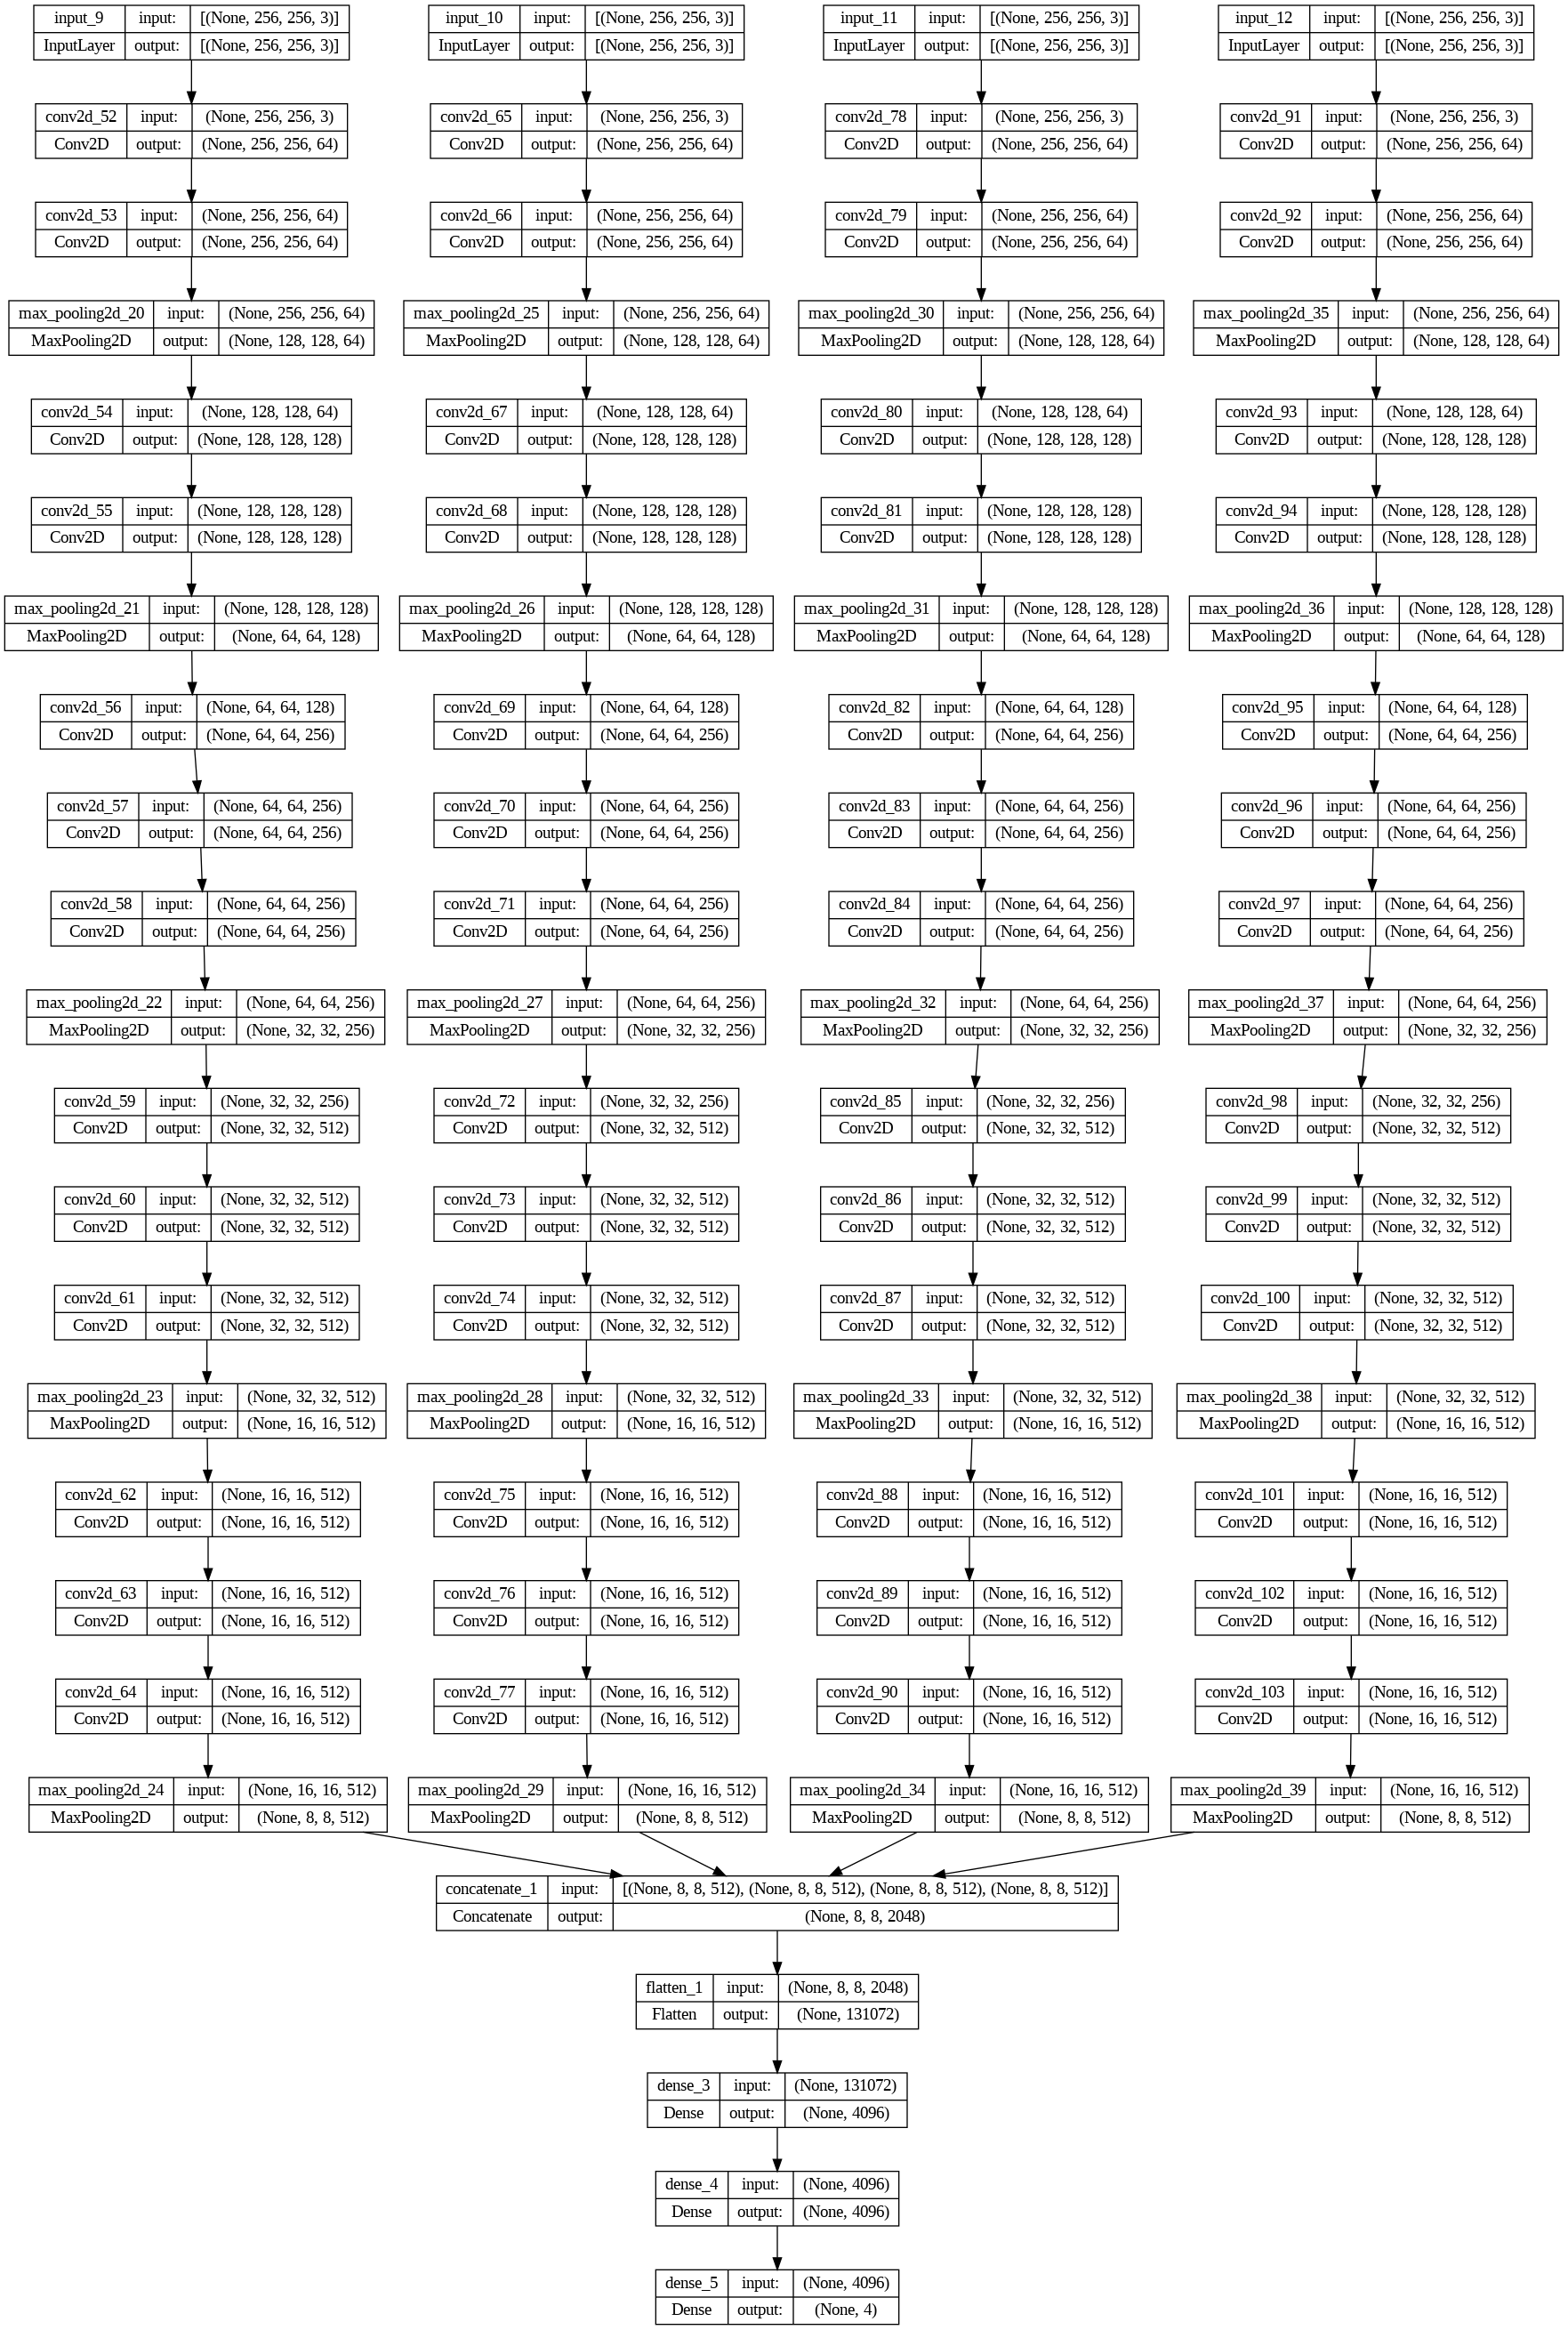

In [ ]:
# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [ ]:
def resize_data1(images, classes):
    return (tf.image.resize(images, (256, 256)),
                    classes)
def resize_data2(images, classes):
    return (tf.image.resize(images, (256, 256)),
                    classes)
def resize_data3(images, classes):
    return (tf.image.resize(images, (256, 256)),
                    classes)
def resize_data4(images, classes):
    return (tf.image.resize(images, (256, 256)),
                    classes)

In [ ]:
def post_zip_process(example1, example2, example3, example4):
    return (example1[0], example2[0], example3[0], example4[0]), example1[1]



In [ ]:
RCC_train_dataset = train_generatorRCC.map(resize_data1)
LCC_train_dataset = train_generatorLCC.map(resize_data1)
RMLO_train_dataset = train_generatorRMLO.map(resize_data1)
LMLO_train_dataset = train_generatorLMLO.map(resize_data1)

train_dataset_zip = tf.data.Dataset.zip((RCC_train_dataset, LCC_train_dataset, RMLO_train_dataset,LMLO_train_dataset))
train_dataset_zip = train_dataset_zip.map(post_zip_process)


In [ ]:
RCC_valid_dataset = validation_generatorRCC.map(resize_data1)
LCC_valid_dataset = validation_generatorLCC.map(resize_data1)
RMLO_valid_dataset = validation_generatorRMLO.map(resize_data1)
LMLO_valid_dataset = validation_generatorLMLO.map(resize_data1)

valid_dataset_zip = tf.data.Dataset.zip((RCC_valid_dataset, LCC_valid_dataset, RMLO_valid_dataset,LMLO_valid_dataset))
valid_dataset_zip = valid_dataset_zip.map(post_zip_process)


In [ ]:
history = model.fit( train_dataset_zip,
                     epochs = 50,
                     validation_data = valid_dataset_zip,
                     shuffle = False
                   )

Epoch 1/50
197/197 [==============================] - 355s 2s/step - loss: 0.1861 - precision_1: 0.9876 - recall_1: 0.9148 - val_loss: 8.9369 - val_precision_1: 0.1825 - val_recall_1: 0.1825
Epoch 2/50
197/197 [==============================] - 39s 195ms/step - loss: 0.3406 - precision_1: 0.9843 - recall_1: 0.8356 - val_loss: 9.4593 - val_precision_1: 0.1825 - val_recall_1: 0.1825
Epoch 3/50
197/197 [==============================] - 39s 196ms/step - loss: 0.4386 - precision_1: 0.9828 - recall_1: 0.7630 - val_loss: 8.7787 - val_precision_1: 0.1825 - val_recall_1: 0.1825
Epoch 4/50
197/197 [==============================] - 39s 195ms/step - loss: 0.6280 - precision_1: 0.9280 - recall_1: 0.6310 - val_loss: 2.1340 - val_precision_1: 0.1825 - val_recall_1: 0.1825
Epoch 5/50
197/197 [==============================] - 39s 195ms/step - loss: 0.5118 - precision_1: 0.8790 - recall_1: 0.7576 - val_loss: 3.7040 - val_precision_1: 0.1825 - val_recall_1: 0.1825
Epoch 6/50
197/197 [=================

KeyboardInterrupt: ignored